In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[16,16,16,16,16,16] #liding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccZ' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccZ is registed now
Build Complete
(254742,)
windowData's num =15914
SourceData's aborting data = 6
window shape is (15914, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=16-SGD
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0848 - val_loss: 0.0758
Epoch 2/50
0s - loss: 0.0707 - val_loss: 0.0659
Epoch 3/50
0s - loss: 0.0615 - val_loss: 0.0570
Epoch 4/50
0s - loss: 0.0527 - val_loss: 0.0483
Epoch 5/50
0s - loss: 0.0443 - val_loss: 0.0404
Epoch 6/50
0s - loss: 0.0369 - val_loss: 0.0337
Epoch 7/50
0s - loss: 0.0309 - val_loss: 0.0283
Epoch 8/50
0s - loss: 0.0262 - val_loss: 0.0242
Epoch 9/50
0s - loss: 0.0226 - val_loss: 0.0212
Epoch 10/50
0s - loss: 0.0200 - val_loss: 0.0189
Epoch 11/50
0s - loss: 0.0180 - val_loss: 0.0172
Epoch 12/50
0s - loss: 0.0166 - val_loss: 0.0159
Epoch 13/50
1s - loss: 0.0154 - val_loss: 0.0149
Epoch 14/50
1s - loss: 0.0145 - val_loss: 0.0141
Epoch 15/50
1s - loss: 0.0138 - val_loss: 0.0134
Epoch 16/50
1s - loss: 0.0131 - val_loss

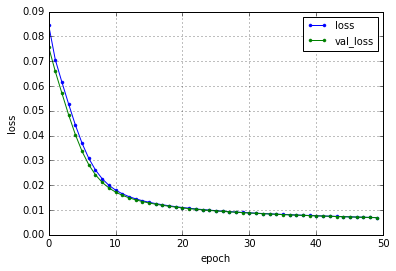

hiden node = 16
-edim=16-Window=128-Overlap=16-Adadelta
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0214 - val_loss: 0.0070
Epoch 2/50
1s - loss: 0.0053 - val_loss: 0.0040
Epoch 3/50
1s - loss: 0.0033 - val_loss: 0.0029
Epoch 4/50
1s - loss: 0.0026 - val_loss: 0.0027
Epoch 5/50
1s - loss: 0.0022 - val_loss: 0.0022
Epoch 6/50
1s - loss: 0.0020 - val_loss: 0.0019
Epoch 7/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 8/50
1s - loss: 0.0017 - val_loss: 0.0021
Epoch 9/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 10/50
1s - loss: 0.0016 - val_loss: 0.0017
Epoch 11/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 12/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 13/50
1s - loss: 0.0014 - val_loss: 0.0018
Epoch 14/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 15/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 16/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 17/50
1s - loss: 0.0012 - val_loss: 0.0014
Epoch 18/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 19/50
1s - loss

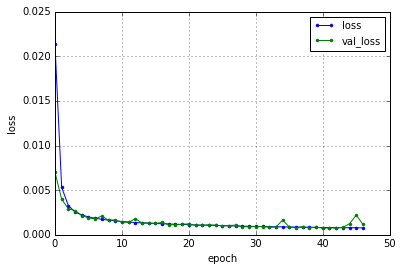

hiden node = 16
-edim=16-Window=128-Overlap=16-Adamax
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0092 - val_loss: 0.0034
Epoch 2/50
1s - loss: 0.0028 - val_loss: 0.0022
Epoch 3/50
1s - loss: 0.0019 - val_loss: 0.0016
Epoch 4/50
1s - loss: 0.0015 - val_loss: 0.0012
Epoch 5/50
1s - loss: 0.0012 - val_loss: 0.0010
Epoch 6/50
1s - loss: 9.7567e-04 - val_loss: 8.5711e-04
Epoch 7/50
1s - loss: 8.5244e-04 - val_loss: 7.8471e-04
Epoch 8/50
1s - loss: 7.6917e-04 - val_loss: 7.6737e-04
Epoch 9/50
1s - loss: 7.0846e-04 - val_loss: 6.3678e-04
Epoch 10/50
1s - loss: 6.5922e-04 - val_loss: 6.0487e-04
Epoch 11/50
1s - loss: 6.2472e-04 - val_loss: 5.4945e-04
Epoch 12/50
1s - loss: 5.8608e-04 - val_loss: 5.5547e-04
Epoch 13/50
1s - loss: 5.5174e-04 - val_loss: 5.0542e-04
Epoch 14/50
1s - loss: 5.1870e-04 - val_loss: 5.2846e-04
Epoch 15/50
1s - loss: 4.9523e-04 - val_loss: 4.5718e-04
Epoch 16/50
1s - loss: 4.9100e-04 - val_loss: 4.4877e-04
Epoch 17/50
1s - loss: 4.9150e-04

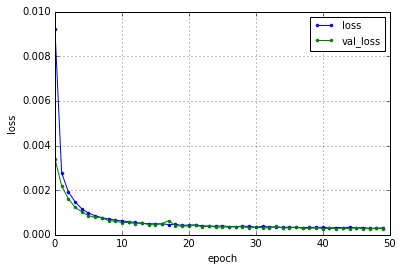

hiden node = 16
-edim=16-Window=128-Overlap=16-Adam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0105 - val_loss: 0.0030
Epoch 2/50
0s - loss: 0.0022 - val_loss: 0.0020
Epoch 3/50
0s - loss: 0.0016 - val_loss: 0.0013
Epoch 4/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 5/50
1s - loss: 0.0011 - val_loss: 9.7496e-04
Epoch 6/50
1s - loss: 8.7639e-04 - val_loss: 7.5326e-04
Epoch 7/50
1s - loss: 8.0316e-04 - val_loss: 0.0011
Epoch 8/50
1s - loss: 6.5906e-04 - val_loss: 8.1380e-04
Epoch 9/50
1s - loss: 6.8304e-04 - val_loss: 5.4082e-04
Epoch 10/50
1s - loss: 5.5089e-04 - val_loss: 8.2292e-04
Epoch 11/50
1s - loss: 5.8536e-04 - val_loss: 4.7994e-04
Epoch 12/50
1s - loss: 5.1964e-04 - val_loss: 4.2998e-04
Epoch 13/50
1s - loss: 4.8518e-04 - val_loss: 6.4013e-04
Epoch 14/50
1s - loss: 4.8739e-04 - val_loss: 3.8513e-04
Epoch 15/50
1s - loss: 4.9014e-04 - val_loss: 3.7169e-04
Epoch 16/50
1s - loss: 4.2060e-04 - val_loss: 3.6511e-04
Epoch 17/50
1s - loss: 4.4597e-04 -

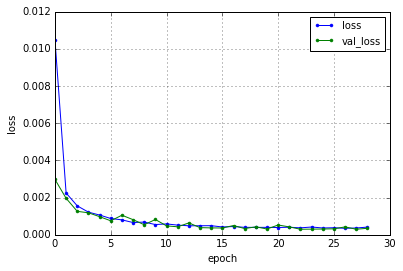

hiden node = 16
-edim=16-Window=128-Overlap=16-Adagrad
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.0055 - val_loss: 0.0026
Epoch 2/50
2s - loss: 0.0023 - val_loss: 0.0020
Epoch 3/50
2s - loss: 0.0019 - val_loss: 0.0021
Epoch 4/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 5/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 6/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 7/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 8/50
1s - loss: 0.0012 - val_loss: 0.0013
Epoch 9/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 10/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 11/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 12/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 13/50
1s - loss: 0.0010 - val_loss: 0.0010
Epoch 14/50
1s - loss: 0.0010 - val_loss: 0.0010
Epoch 15/50
1s - loss: 9.8544e-04 - val_loss: 9.8688e-04
Epoch 16/50
1s - loss: 9.5578e-04 - val_loss: 9.5045e-04
Epoch 17/50
1s - loss: 9.3561e-04 - val_loss: 9.4914e-04
Epoch 18/50
1s - loss: 9.1294e-04 - val_loss: 9

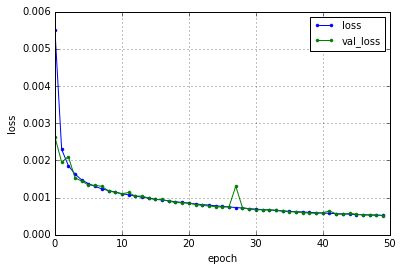

hiden node = 16
-edim=16-Window=128-Overlap=16-RMSprop
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.0087 - val_loss: 0.0022
Epoch 2/50
2s - loss: 0.0021 - val_loss: 0.0014
Epoch 3/50
2s - loss: 0.0018 - val_loss: 0.0032
Epoch 4/50
2s - loss: 0.0016 - val_loss: 0.0022
Epoch 5/50
2s - loss: 0.0015 - val_loss: 0.0010
Epoch 6/50
2s - loss: 0.0014 - val_loss: 0.0015
Epoch 7/50
2s - loss: 0.0013 - val_loss: 8.5018e-04
Epoch 8/50
2s - loss: 0.0013 - val_loss: 0.0014
Epoch 9/50
2s - loss: 0.0013 - val_loss: 0.0013
Epoch 10/50
2s - loss: 0.0012 - val_loss: 8.6886e-04
Epoch 11/50
2s - loss: 0.0012 - val_loss: 0.0016
Epoch 12/50
2s - loss: 0.0012 - val_loss: 0.0013
Epoch 13/50
1s - loss: 0.0011 - val_loss: 7.9005e-04
Epoch 14/50
1s - loss: 0.0011 - val_loss: 9.1994e-04
Epoch 15/50
2s - loss: 0.0011 - val_loss: 9.7734e-04
Epoch 16/50
2s - loss: 0.0011 - val_loss: 0.0013
Epoch 17/50
2s - loss: 0.0011 - val_loss: 0.0012
Epoch 18/50
2s - loss: 0.0011 - val_loss: 0.0029
Ep

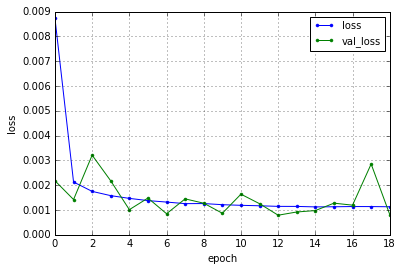

hiden node = 16
-edim=16-Window=128-Overlap=16-Nadam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.0065 - val_loss: 0.0020
Epoch 2/50
2s - loss: 0.0021 - val_loss: 0.0377
Epoch 3/50
1s - loss: 0.0019 - val_loss: 0.0013
Epoch 4/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 5/50
1s - loss: 0.0013 - val_loss: 0.0017
Epoch 6/50
1s - loss: 0.0012 - val_loss: 8.5423e-04
Epoch 7/50
1s - loss: 0.0011 - val_loss: 0.0018
Epoch 8/50
1s - loss: 0.0010 - val_loss: 0.0010
Epoch 9/50
1s - loss: 9.0772e-04 - val_loss: 6.5933e-04
Epoch 10/50
1s - loss: 8.9629e-04 - val_loss: 9.3834e-04
Epoch 11/50
1s - loss: 9.0105e-04 - val_loss: 5.5255e-04
Epoch 12/50
1s - loss: 8.2237e-04 - val_loss: 6.5110e-04
Epoch 13/50
1s - loss: 8.9962e-04 - val_loss: 0.0011
Epoch 14/50
1s - loss: 6.8333e-04 - val_loss: 5.1358e-04
Epoch 15/50
1s - loss: 6.5365e-04 - val_loss: 0.0020
Epoch 16/50
1s - loss: 6.9727e-04 - val_loss: 5.7168e-04
Epoch 17/50
1s - loss: 6.3618e-04 - val_loss: 5.5607e-04
Epoch

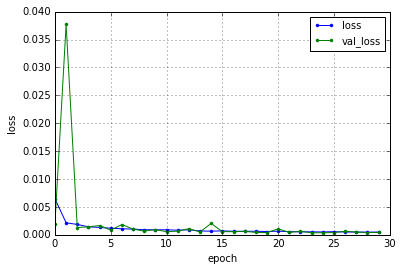

AccZ is registed now
Build Complete
(254742,)
windowData's num =15906
SourceData's aborting data = 6
window shape is (15906, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=16-SGD
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
2s - loss: 0.0844 - val_loss: 0.0790
Epoch 2/50
2s - loss: 0.0759 - val_loss: 0.0732
Epoch 3/50
2s - loss: 0.0707 - val_loss: 0.0680
Epoch 4/50
2s - loss: 0.0651 - val_loss: 0.0621
Epoch 5/50
2s - loss: 0.0589 - val_loss: 0.0557
Epoch 6/50
2s - loss: 0.0525 - val_loss: 0.0494
Epoch 7/50
2s - loss: 0.0464 - val_loss: 0.0435
Epoch 8/50
2s - loss: 0.0410 - val_loss: 0.0385
Epoch 9/50
2s - loss: 0.0363 - val_loss: 0.0343
Epoch 10/50
2s - loss: 0.0326 - val_loss: 0.0309
Epoch 11/50
2s - loss: 0.0295 - val_loss: 0.0282
Epoch 12/50
2s - loss: 0.0271 - val_loss: 0.0261
Epoch 13/50
2s - loss: 0.0252 - val_loss: 0.0244
Epoch 14/50
2s - loss: 0.0237 - val_loss: 0.0230
Epoch 15/50
2s - loss: 0.0224 - val_loss: 0.0219
Epoch 16/50
2s - loss: 0.0214 - val_loss

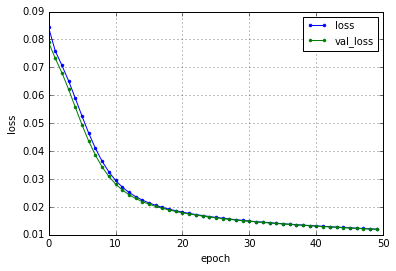

hiden node = 16
-edim=16-Window=256-Overlap=16-Adadelta
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0244 - val_loss: 0.0099
Epoch 2/50
1s - loss: 0.0078 - val_loss: 0.0068
Epoch 3/50
2s - loss: 0.0058 - val_loss: 0.0053
Epoch 4/50
2s - loss: 0.0046 - val_loss: 0.0043
Epoch 5/50
2s - loss: 0.0038 - val_loss: 0.0042
Epoch 6/50
1s - loss: 0.0034 - val_loss: 0.0034
Epoch 7/50
1s - loss: 0.0031 - val_loss: 0.0030
Epoch 8/50
1s - loss: 0.0029 - val_loss: 0.0031
Epoch 9/50
1s - loss: 0.0028 - val_loss: 0.0074
Epoch 10/50
1s - loss: 0.0026 - val_loss: 0.0026
Epoch 11/50
1s - loss: 0.0025 - val_loss: 0.0032
Epoch 12/50
1s - loss: 0.0024 - val_loss: 0.0023
Epoch 13/50
1s - loss: 0.0024 - val_loss: 0.0022
Epoch 14/50
1s - loss: 0.0023 - val_loss: 0.0022
Epoch 15/50
1s - loss: 0.0022 - val_loss: 0.0023
Epoch 16/50
1s - loss: 0.0021 - val_loss: 0.0029
Epoch 17/50
1s - loss: 0.0021 - val_loss: 0.0021
Epoch 18/50
1s - loss: 0.0020 - val_loss: 0.0028
Epoch 19/50
1s - loss

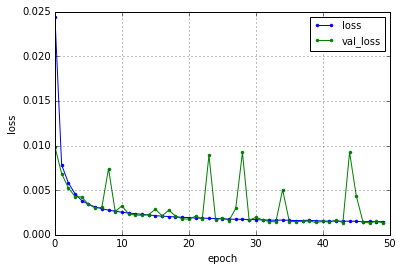

hiden node = 16
-edim=16-Window=256-Overlap=16-Adamax
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0126 - val_loss: 0.0052
Epoch 2/50
1s - loss: 0.0038 - val_loss: 0.0030
Epoch 3/50
1s - loss: 0.0027 - val_loss: 0.0024
Epoch 4/50
1s - loss: 0.0022 - val_loss: 0.0019
Epoch 5/50
1s - loss: 0.0018 - val_loss: 0.0018
Epoch 6/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 7/50
1s - loss: 0.0014 - val_loss: 0.0032
Epoch 8/50
1s - loss: 0.0013 - val_loss: 0.0015
Epoch 9/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 11/50
1s - loss: 0.0011 - val_loss: 9.9515e-04
Epoch 12/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 13/50
1s - loss: 9.6990e-04 - val_loss: 9.7015e-04
Epoch 14/50
1s - loss: 9.3880e-04 - val_loss: 0.0018
Epoch 15/50
1s - loss: 8.8528e-04 - val_loss: 8.4727e-04
Epoch 16/50
1s - loss: 8.5053e-04 - val_loss: 8.0597e-04
Epoch 17/50
1s - loss: 8.0019e-04 - val_loss: 7.7801e-04
Epoch 18/50
1s - loss: 8.0164e-0

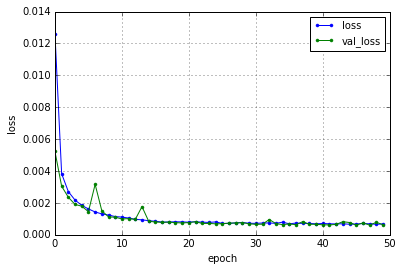

hiden node = 16
-edim=16-Window=256-Overlap=16-Adam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
2s - loss: 0.0114 - val_loss: 0.0042
Epoch 2/50
2s - loss: 0.0030 - val_loss: 0.0028
Epoch 3/50
2s - loss: 0.0022 - val_loss: 0.0020
Epoch 4/50
2s - loss: 0.0018 - val_loss: 0.0015
Epoch 5/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 6/50
1s - loss: 0.0014 - val_loss: 0.0012
Epoch 7/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 8/50
1s - loss: 0.0012 - val_loss: 0.0010
Epoch 9/50
1s - loss: 0.0011 - val_loss: 0.0022
Epoch 10/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 11/50
1s - loss: 9.8621e-04 - val_loss: 8.1271e-04
Epoch 12/50
1s - loss: 9.7372e-04 - val_loss: 8.9629e-04
Epoch 13/50
1s - loss: 9.2715e-04 - val_loss: 9.2241e-04
Epoch 14/50
2s - loss: 0.0011 - val_loss: 0.0013
Epoch 15/50
2s - loss: 9.0159e-04 - val_loss: 0.0010
Epoch 16/50
2s - loss: 9.2476e-04 - val_loss: 0.0011
Epoch 17/50
2s - loss: 9.1097e-04 - val_loss: 7.2784e-04
Epoch 18/50
1s - loss: 8.5800e-04 

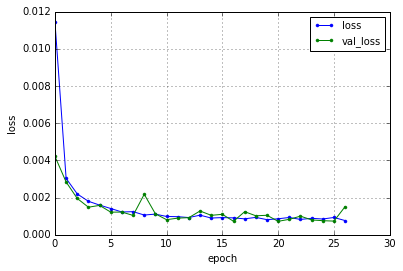

hiden node = 16
-edim=16-Window=256-Overlap=16-Adagrad
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
2s - loss: 0.0080 - val_loss: 0.0042
Epoch 2/50
1s - loss: 0.0036 - val_loss: 0.0032
Epoch 3/50
1s - loss: 0.0028 - val_loss: 0.0027
Epoch 4/50
2s - loss: 0.0024 - val_loss: 0.0024
Epoch 5/50
2s - loss: 0.0022 - val_loss: 0.0022
Epoch 6/50
2s - loss: 0.0021 - val_loss: 0.0024
Epoch 7/50
2s - loss: 0.0019 - val_loss: 0.0023
Epoch 8/50
2s - loss: 0.0019 - val_loss: 0.0018
Epoch 9/50
1s - loss: 0.0018 - val_loss: 0.0019
Epoch 10/50
1s - loss: 0.0017 - val_loss: 0.0018
Epoch 11/50
2s - loss: 0.0017 - val_loss: 0.0017
Epoch 12/50
2s - loss: 0.0016 - val_loss: 0.0016
Epoch 13/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 14/50
1s - loss: 0.0015 - val_loss: 0.0074
Epoch 15/50
1s - loss: 0.0015 - val_loss: 0.0016
Epoch 16/50
1s - loss: 0.0015 - val_loss: 0.0017
Epoch 17/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 18/50
1s - loss: 0.0014 - val_loss: 0.0042
Epoch 19/50
1s - loss:

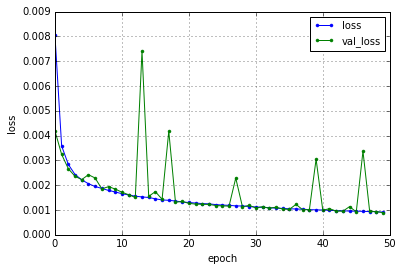

hiden node = 16
-edim=16-Window=256-Overlap=16-RMSprop
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0090 - val_loss: 0.0123
Epoch 2/50
1s - loss: 0.0036 - val_loss: 0.0032
Epoch 3/50
1s - loss: 0.0031 - val_loss: 0.0025
Epoch 4/50
1s - loss: 0.0029 - val_loss: 0.0143
Epoch 5/50
1s - loss: 0.0027 - val_loss: 0.0033
Epoch 6/50
1s - loss: 0.0026 - val_loss: 0.0044
Epoch 7/50
1s - loss: 0.0026 - val_loss: 0.0096
Epoch 8/50
1s - loss: 0.0025 - val_loss: 0.0021
Epoch 9/50
0s - loss: 0.0025 - val_loss: 0.0017
Epoch 10/50
0s - loss: 0.0024 - val_loss: 0.0017
Epoch 11/50
0s - loss: 0.0024 - val_loss: 0.0015
Epoch 12/50
0s - loss: 0.0024 - val_loss: 0.0017
Epoch 13/50
1s - loss: 0.0023 - val_loss: 0.0014
Epoch 14/50
1s - loss: 0.0023 - val_loss: 0.0014
Epoch 15/50
1s - loss: 0.0023 - val_loss: 0.0015
Epoch 16/50
1s - loss: 0.0023 - val_loss: 0.0019
Epoch 17/50
1s - loss: 0.0022 - val_loss: 0.0169
Epoch 18/50
1s - loss: 0.0022 - val_loss: 0.0069
Epoch 19/50
1s - loss:

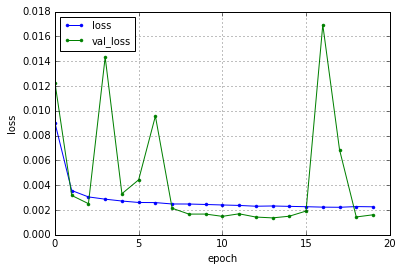

hiden node = 16
-edim=16-Window=256-Overlap=16-Nadam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0097 - val_loss: 0.0166
Epoch 2/50
1s - loss: 0.0038 - val_loss: 0.0047
Epoch 3/50
1s - loss: 0.0031 - val_loss: 0.0020
Epoch 4/50
1s - loss: 0.0028 - val_loss: 0.0022
Epoch 5/50
1s - loss: 0.0026 - val_loss: 0.0019
Epoch 6/50
1s - loss: 0.0022 - val_loss: 0.0016
Epoch 7/50
1s - loss: 0.0023 - val_loss: 0.0021
Epoch 8/50
1s - loss: 0.0024 - val_loss: 0.0019
Epoch 9/50
1s - loss: 0.0019 - val_loss: 0.0019
Epoch 10/50
1s - loss: 0.0018 - val_loss: 0.0319
Epoch 11/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 12/50
1s - loss: 0.0018 - val_loss: 0.0020
Epoch 13/50
1s - loss: 0.0015 - val_loss: 0.0011
Epoch 14/50
1s - loss: 0.0015 - val_loss: 0.0013
Epoch 15/50
1s - loss: 0.0016 - val_loss: 0.0411
Epoch 16/50
1s - loss: 0.0014 - val_loss: 0.0048
Epoch 17/50
1s - loss: 0.0014 - val_loss: 0.0210
Epoch 18/50
1s - loss: 0.0015 - val_loss: 9.4838e-04
Epoch 19/50
1s - los

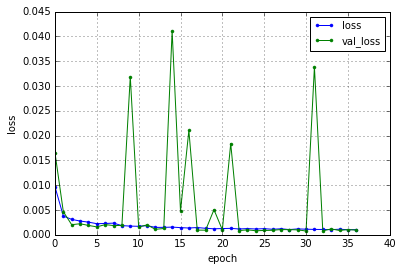

AccZ is registed now
Build Complete
(254742,)
windowData's num =15890
SourceData's aborting data = 6
window shape is (15890, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=16-SGD
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
2s - loss: 0.0833 - val_loss: 0.0810
Epoch 2/50
2s - loss: 0.0793 - val_loss: 0.0778
Epoch 3/50
2s - loss: 0.0764 - val_loss: 0.0750
Epoch 4/50
2s - loss: 0.0735 - val_loss: 0.0720
Epoch 5/50
2s - loss: 0.0703 - val_loss: 0.0686
Epoch 6/50
2s - loss: 0.0668 - val_loss: 0.0650
Epoch 7/50
2s - loss: 0.0631 - val_loss: 0.0611
Epoch 8/50
2s - loss: 0.0592 - val_loss: 0.0573
Epoch 9/50
2s - loss: 0.0554 - val_loss: 0.0536
Epoch 10/50
1s - loss: 0.0518 - val_loss: 0.0501
Epoch 11/50
2s - loss: 0.0485 - val_loss: 0.0469
Epoch 12/50
1s - loss: 0.0454 - val_loss: 0.0440
Epoch 13/50
1s - loss: 0.0427 - val_loss: 0.0414
Epoch 14/50
1s - loss: 0.0403 - val_loss: 0.0392
Epoch 15/50
1s - loss: 0.0382 - val_loss: 0.0373
Epoch 16/50
1s - loss: 0.0364 - val_loss

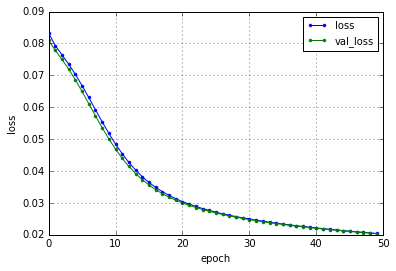

hiden node = 16
-edim=16-Window=512-Overlap=16-Adadelta
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0289 - val_loss: 0.0158
Epoch 2/50
1s - loss: 0.0128 - val_loss: 0.0109
Epoch 3/50
1s - loss: 0.0098 - val_loss: 0.0090
Epoch 4/50
1s - loss: 0.0083 - val_loss: 0.0079
Epoch 5/50
1s - loss: 0.0074 - val_loss: 0.0070
Epoch 6/50
1s - loss: 0.0065 - val_loss: 0.0085
Epoch 7/50
1s - loss: 0.0060 - val_loss: 0.0058
Epoch 8/50
1s - loss: 0.0055 - val_loss: 0.0051
Epoch 9/50
1s - loss: 0.0052 - val_loss: 0.0049
Epoch 10/50
1s - loss: 0.0050 - val_loss: 0.0049
Epoch 11/50
1s - loss: 0.0047 - val_loss: 0.0045
Epoch 12/50
1s - loss: 0.0045 - val_loss: 0.0043
Epoch 13/50
1s - loss: 0.0044 - val_loss: 0.0040
Epoch 14/50
1s - loss: 0.0043 - val_loss: 0.0039
Epoch 15/50
1s - loss: 0.0041 - val_loss: 0.0038
Epoch 16/50
1s - loss: 0.0041 - val_loss: 0.0037
Epoch 17/50
1s - loss: 0.0040 - val_loss: 0.0037
Epoch 18/50
1s - loss: 0.0039 - val_loss: 0.0055
Epoch 19/50
1s - loss

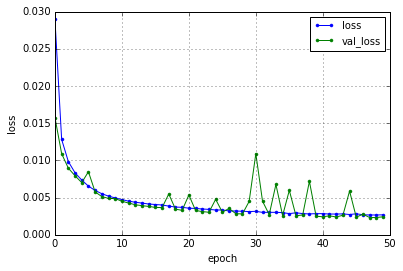

hiden node = 16
-edim=16-Window=512-Overlap=16-Adamax
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0130 - val_loss: 0.0061
Epoch 2/50
1s - loss: 0.0050 - val_loss: 0.0040
Epoch 3/50
1s - loss: 0.0037 - val_loss: 0.0034
Epoch 4/50
1s - loss: 0.0029 - val_loss: 0.0026
Epoch 5/50
1s - loss: 0.0024 - val_loss: 0.0022
Epoch 6/50
1s - loss: 0.0022 - val_loss: 0.0031
Epoch 7/50
1s - loss: 0.0020 - val_loss: 0.0018
Epoch 8/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 9/50
1s - loss: 0.0018 - val_loss: 0.0016
Epoch 10/50
1s - loss: 0.0017 - val_loss: 0.0015
Epoch 11/50
1s - loss: 0.0017 - val_loss: 0.0015
Epoch 12/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 13/50
1s - loss: 0.0017 - val_loss: 0.0022
Epoch 14/50
1s - loss: 0.0016 - val_loss: 0.0014
Epoch 15/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 16/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 17/50
1s - loss: 0.0016 - val_loss: 0.0014
Epoch 18/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 19/50
1s - loss: 

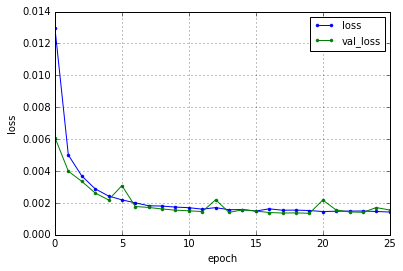

hiden node = 16
-edim=16-Window=512-Overlap=16-Adam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0136 - val_loss: 0.0053
Epoch 2/50
1s - loss: 0.0045 - val_loss: 0.0035
Epoch 3/50
1s - loss: 0.0035 - val_loss: 0.0028
Epoch 4/50
1s - loss: 0.0030 - val_loss: 0.0025
Epoch 5/50
1s - loss: 0.0027 - val_loss: 0.0022
Epoch 6/50
1s - loss: 0.0023 - val_loss: 0.0023
Epoch 7/50
1s - loss: 0.0021 - val_loss: 0.0017
Epoch 8/50
1s - loss: 0.0020 - val_loss: 0.0024
Epoch 9/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 10/50
1s - loss: 0.0020 - val_loss: 0.0016
Epoch 11/50
1s - loss: 0.0021 - val_loss: 0.0018
Epoch 12/50
1s - loss: 0.0017 - val_loss: 0.0015
Epoch 13/50
1s - loss: 0.0020 - val_loss: 0.0015
Epoch 14/50
1s - loss: 0.0018 - val_loss: 0.0015
Epoch 15/50
1s - loss: 0.0017 - val_loss: 0.0018
Epoch 16/50
1s - loss: 0.0021 - val_loss: 0.0021
Epoch 17/50
1s - loss: 0.0017 - val_loss: 0.0014
Epoch 18/50
1s - loss: 0.0017 - val_loss: 0.0024
Epoch 19/50
1s - loss: 0.

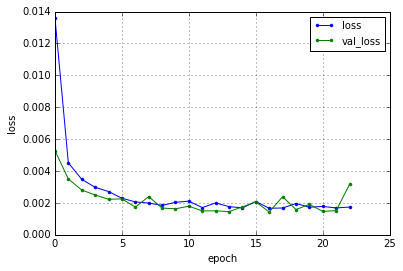

hiden node = 16
-edim=16-Window=512-Overlap=16-Adagrad
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0114 - val_loss: 0.0073
Epoch 2/50
1s - loss: 0.0055 - val_loss: 0.0046
Epoch 3/50
1s - loss: 0.0044 - val_loss: 0.0039
Epoch 4/50
1s - loss: 0.0038 - val_loss: 0.0038
Epoch 5/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 6/50
1s - loss: 0.0032 - val_loss: 0.0029
Epoch 7/50
1s - loss: 0.0030 - val_loss: 0.0030
Epoch 8/50
1s - loss: 0.0029 - val_loss: 0.0027
Epoch 9/50
1s - loss: 0.0027 - val_loss: 0.0026
Epoch 10/50
1s - loss: 0.0026 - val_loss: 0.0025
Epoch 11/50
1s - loss: 0.0025 - val_loss: 0.0023
Epoch 12/50
1s - loss: 0.0024 - val_loss: 0.0023
Epoch 13/50
1s - loss: 0.0023 - val_loss: 0.0022
Epoch 14/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 15/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 16/50
1s - loss: 0.0021 - val_loss: 0.0021
Epoch 17/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 18/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 19/50
1s - loss:

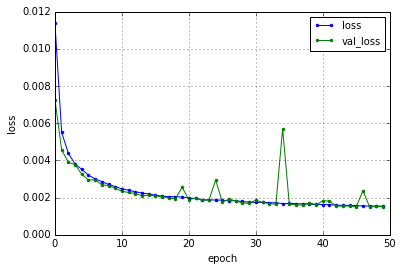

hiden node = 16
-edim=16-Window=512-Overlap=16-RMSprop
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0122 - val_loss: 0.0062
Epoch 2/50
1s - loss: 0.0059 - val_loss: 0.0058
Epoch 3/50
1s - loss: 0.0053 - val_loss: 0.0204
Epoch 4/50
1s - loss: 0.0050 - val_loss: 0.0042
Epoch 5/50
1s - loss: 0.0048 - val_loss: 0.0054
Epoch 6/50
1s - loss: 0.0047 - val_loss: 0.0032
Epoch 7/50
1s - loss: 0.0046 - val_loss: 0.0074
Epoch 8/50
1s - loss: 0.0046 - val_loss: 0.0035
Epoch 9/50
1s - loss: 0.0045 - val_loss: 0.0061
Epoch 10/50
1s - loss: 0.0044 - val_loss: 0.0061
Epoch 11/50
1s - loss: 0.0045 - val_loss: 0.0095
Epoch 12/50
1s - loss: 0.0044 - val_loss: 0.0029
Epoch 13/50
1s - loss: 0.0043 - val_loss: 0.0031
Epoch 14/50
1s - loss: 0.0044 - val_loss: 0.0057
Epoch 15/50
1s - loss: 0.0043 - val_loss: 0.0038
Epoch 16/50
1s - loss: 0.0043 - val_loss: 0.0038
Epoch 17/50
1s - loss: 0.0043 - val_loss: 0.0068
Epoch 18/50
1s - loss: 0.0043 - val_loss: 0.0179


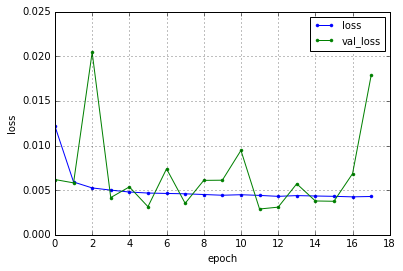

hiden node = 16
-edim=16-Window=512-Overlap=16-Nadam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0123 - val_loss: 0.0055
Epoch 2/50
1s - loss: 0.0063 - val_loss: 0.0055
Epoch 3/50
1s - loss: 0.0056 - val_loss: 0.0056
Epoch 4/50
1s - loss: 0.0047 - val_loss: 0.0034
Epoch 5/50
1s - loss: 0.0046 - val_loss: 0.0039
Epoch 6/50
1s - loss: 0.0047 - val_loss: 0.0037
Epoch 7/50
1s - loss: 0.0039 - val_loss: 0.0042
Epoch 8/50
1s - loss: 0.0037 - val_loss: 0.0023
Epoch 9/50
1s - loss: 0.0037 - val_loss: 0.0051
Epoch 10/50
1s - loss: 0.0034 - val_loss: 0.0102
Epoch 11/50
1s - loss: 0.0034 - val_loss: 0.0028
Epoch 12/50
1s - loss: 0.0032 - val_loss: 0.0080
Epoch 13/50
1s - loss: 0.0032 - val_loss: 0.0025
Epoch 14/50
1s - loss: 0.0030 - val_loss: 0.0037


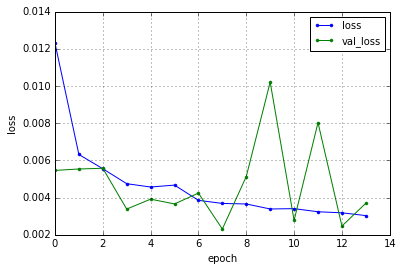

AccZ is registed now
Build Complete
(254742,)
windowData's num =15858
SourceData's aborting data = 6
window shape is (15858, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=16-SGD
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0839 - val_loss: 0.0831
Epoch 2/50
1s - loss: 0.0825 - val_loss: 0.0820
Epoch 3/50
1s - loss: 0.0816 - val_loss: 0.0811
Epoch 4/50
1s - loss: 0.0807 - val_loss: 0.0802
Epoch 5/50
1s - loss: 0.0796 - val_loss: 0.0790
Epoch 6/50
1s - loss: 0.0784 - val_loss: 0.0777
Epoch 7/50
1s - loss: 0.0769 - val_loss: 0.0761
Epoch 8/50
1s - loss: 0.0752 - val_loss: 0.0742
Epoch 9/50
1s - loss: 0.0732 - val_loss: 0.0722
Epoch 10/50
1s - loss: 0.0711 - val_loss: 0.0700
Epoch 11/50
1s - loss: 0.0689 - val_loss: 0.0678
Epoch 12/50
1s - loss: 0.0666 - val_loss: 0.0655
Epoch 13/50
1s - loss: 0.0644 - val_loss: 0.0632
Epoch 14/50
1s - loss: 0.0621 - val_loss: 0.0610
Epoch 15/50
1s - loss: 0.0600 - val_loss: 0.0589
Epoch 16/50
1s - loss: 0.0579 - val_lo

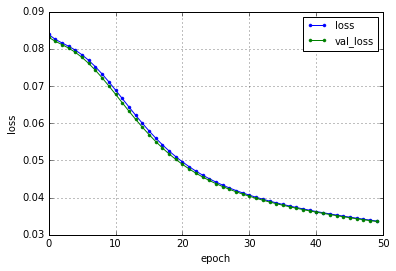

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adadelta
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0402 - val_loss: 0.0262
Epoch 2/50
1s - loss: 0.0217 - val_loss: 0.0187
Epoch 3/50
1s - loss: 0.0168 - val_loss: 0.0152
Epoch 4/50
1s - loss: 0.0143 - val_loss: 0.0134
Epoch 5/50
1s - loss: 0.0128 - val_loss: 0.0123
Epoch 6/50
1s - loss: 0.0117 - val_loss: 0.0112
Epoch 7/50
2s - loss: 0.0109 - val_loss: 0.0110
Epoch 8/50
2s - loss: 0.0102 - val_loss: 0.0103
Epoch 9/50
2s - loss: 0.0096 - val_loss: 0.0098
Epoch 10/50
1s - loss: 0.0091 - val_loss: 0.0101
Epoch 11/50
1s - loss: 0.0088 - val_loss: 0.0084
Epoch 12/50
1s - loss: 0.0084 - val_loss: 0.0081
Epoch 13/50
2s - loss: 0.0081 - val_loss: 0.0075
Epoch 14/50
1s - loss: 0.0079 - val_loss: 0.0076
Epoch 15/50
1s - loss: 0.0077 - val_loss: 0.0074
Epoch 16/50
1s - loss: 0.0073 - val_loss: 0.0069
Epoch 17/50
1s - loss: 0.0072 - val_loss: 0.0069
Epoch 18/50
1s - loss: 0.0072 - val_loss: 0.0064
Epoch 19/50
1s - los

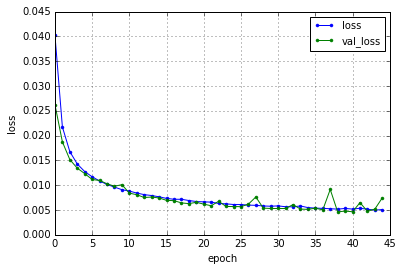

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adamax
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0176 - val_loss: 0.0093
Epoch 2/50
1s - loss: 0.0078 - val_loss: 0.0061
Epoch 3/50
1s - loss: 0.0057 - val_loss: 0.0050
Epoch 4/50
1s - loss: 0.0045 - val_loss: 0.0039
Epoch 5/50
1s - loss: 0.0039 - val_loss: 0.0043
Epoch 6/50
1s - loss: 0.0038 - val_loss: 0.0032
Epoch 7/50
1s - loss: 0.0035 - val_loss: 0.0031
Epoch 8/50
1s - loss: 0.0033 - val_loss: 0.0035
Epoch 9/50
1s - loss: 0.0033 - val_loss: 0.0030
Epoch 10/50
1s - loss: 0.0033 - val_loss: 0.0029
Epoch 11/50
1s - loss: 0.0030 - val_loss: 0.0029
Epoch 12/50
1s - loss: 0.0032 - val_loss: 0.0031
Epoch 13/50
1s - loss: 0.0033 - val_loss: 0.0029
Epoch 14/50
1s - loss: 0.0028 - val_loss: 0.0027
Epoch 15/50
1s - loss: 0.0030 - val_loss: 0.0040
Epoch 16/50
1s - loss: 0.0032 - val_loss: 0.0032
Epoch 17/50
1s - loss: 0.0029 - val_loss: 0.0031
Epoch 18/50
1s - loss: 0.0031 - val_loss: 0.0031
Epoch 19/50
1s - loss:

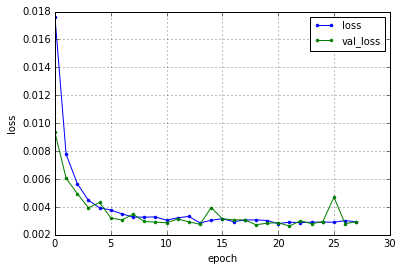

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0163 - val_loss: 0.0088
Epoch 2/50
1s - loss: 0.0069 - val_loss: 0.0057
Epoch 3/50
1s - loss: 0.0054 - val_loss: 0.0053
Epoch 4/50
1s - loss: 0.0049 - val_loss: 0.0041
Epoch 5/50
1s - loss: 0.0042 - val_loss: 0.0035
Epoch 6/50
1s - loss: 0.0043 - val_loss: 0.0040
Epoch 7/50
1s - loss: 0.0038 - val_loss: 0.0034
Epoch 8/50
1s - loss: 0.0040 - val_loss: 0.0031
Epoch 9/50
1s - loss: 0.0036 - val_loss: 0.0032
Epoch 10/50
1s - loss: 0.0039 - val_loss: 0.0030
Epoch 11/50
1s - loss: 0.0036 - val_loss: 0.0031
Epoch 12/50
1s - loss: 0.0036 - val_loss: 0.0048
Epoch 13/50
1s - loss: 0.0037 - val_loss: 0.0030
Epoch 14/50
1s - loss: 0.0036 - val_loss: 0.0034
Epoch 15/50
1s - loss: 0.0037 - val_loss: 0.0030
Epoch 16/50
1s - loss: 0.0036 - val_loss: 0.0039
Epoch 17/50
1s - loss: 0.0037 - val_loss: 0.0036
Epoch 18/50
1s - loss: 0.0035 - val_loss: 0.0034
Epoch 19/50
1s - loss: 0

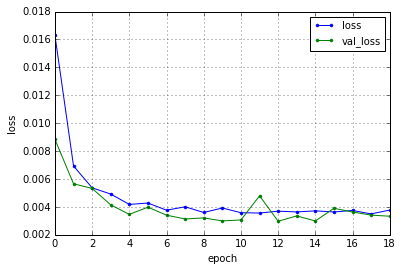

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adagrad
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0159 - val_loss: 0.0097
Epoch 2/50
1s - loss: 0.0085 - val_loss: 0.0070
Epoch 3/50
1s - loss: 0.0070 - val_loss: 0.0061
Epoch 4/50
1s - loss: 0.0061 - val_loss: 0.0052
Epoch 5/50
1s - loss: 0.0054 - val_loss: 0.0049
Epoch 6/50
1s - loss: 0.0051 - val_loss: 0.0053
Epoch 7/50
1s - loss: 0.0049 - val_loss: 0.0046
Epoch 8/50
1s - loss: 0.0045 - val_loss: 0.0043
Epoch 9/50
1s - loss: 0.0044 - val_loss: 0.0040
Epoch 10/50
1s - loss: 0.0042 - val_loss: 0.0047
Epoch 11/50
1s - loss: 0.0042 - val_loss: 0.0038
Epoch 12/50
1s - loss: 0.0040 - val_loss: 0.0039
Epoch 13/50
1s - loss: 0.0039 - val_loss: 0.0037
Epoch 14/50
1s - loss: 0.0037 - val_loss: 0.0036
Epoch 15/50
1s - loss: 0.0038 - val_loss: 0.0038
Epoch 16/50
1s - loss: 0.0037 - val_loss: 0.0036
Epoch 17/50
1s - loss: 0.0036 - val_loss: 0.0035
Epoch 18/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 19/50
1s - loss

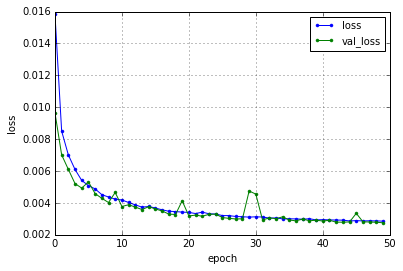

hiden node = 16
-edim=16-Window=1024-Overlap=16-RMSprop
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0175 - val_loss: 0.0207
Epoch 2/50
1s - loss: 0.0101 - val_loss: 0.0134
Epoch 3/50
1s - loss: 0.0091 - val_loss: 0.0086
Epoch 4/50
1s - loss: 0.0089 - val_loss: 0.0094
Epoch 5/50
1s - loss: 0.0086 - val_loss: 0.0141
Epoch 6/50
1s - loss: 0.0086 - val_loss: 0.0116
Epoch 7/50
1s - loss: 0.0084 - val_loss: 0.0058
Epoch 8/50
1s - loss: 0.0082 - val_loss: 0.0055
Epoch 9/50
1s - loss: 0.0083 - val_loss: 0.0055
Epoch 10/50
2s - loss: 0.0082 - val_loss: 0.0062
Epoch 11/50
1s - loss: 0.0082 - val_loss: 0.0060
Epoch 12/50
1s - loss: 0.0081 - val_loss: 0.0073
Epoch 13/50
3s - loss: 0.0082 - val_loss: 0.0053
Epoch 14/50
3s - loss: 0.0082 - val_loss: 0.0058
Epoch 15/50
1s - loss: 0.0080 - val_loss: 0.0058
Epoch 16/50
1s - loss: 0.0081 - val_loss: 0.0074
Epoch 17/50
1s - loss: 0.0082 - val_loss: 0.0124
Epoch 18/50
1s - loss: 0.0080 - val_loss: 0.0204
Epoch 19/50
1s - loss

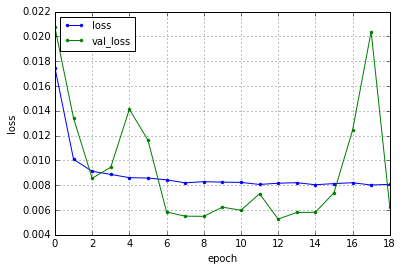

hiden node = 16
-edim=16-Window=1024-Overlap=16-Nadam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0174 - val_loss: 0.0087
Epoch 2/50
1s - loss: 0.0108 - val_loss: 0.0070
Epoch 3/50
1s - loss: 0.0098 - val_loss: 0.0088
Epoch 4/50
1s - loss: 0.0091 - val_loss: 0.0088
Epoch 5/50
1s - loss: 0.0089 - val_loss: 0.0057
Epoch 6/50
1s - loss: 0.0087 - val_loss: 0.0074
Epoch 7/50
1s - loss: 0.0078 - val_loss: 0.0087
Epoch 8/50
1s - loss: 0.0077 - val_loss: 0.0063
Epoch 9/50
1s - loss: 0.0071 - val_loss: 0.0115
Epoch 10/50
2s - loss: 0.0069 - val_loss: 0.0061
Epoch 11/50
1s - loss: 0.0072 - val_loss: 0.0048
Epoch 12/50
1s - loss: 0.0079 - val_loss: 0.0045
Epoch 13/50
1s - loss: 0.0064 - val_loss: 0.0041
Epoch 14/50
1s - loss: 0.0061 - val_loss: 0.0047
Epoch 15/50
2s - loss: 0.0062 - val_loss: 0.0048
Epoch 16/50
1s - loss: 0.0058 - val_loss: 0.0051
Epoch 17/50
1s - loss: 0.0061 - val_loss: 0.0059
Epoch 18/50
2s - loss: 0.0056 - val_loss: 0.0042
Epoch 19/50
2s - loss: 

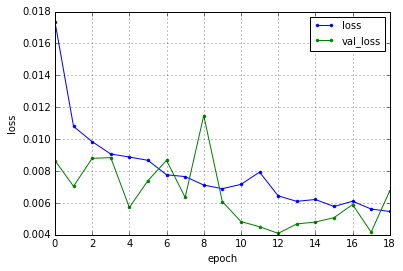

AccZ is registed now
Build Complete
(254742,)
windowData's num =15794
SourceData's aborting data = 6
window shape is (15794, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=16-SGD
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0831 - val_loss: 0.0827
Epoch 2/50
3s - loss: 0.0824 - val_loss: 0.0820
Epoch 3/50
3s - loss: 0.0818 - val_loss: 0.0815
Epoch 4/50
3s - loss: 0.0813 - val_loss: 0.0811
Epoch 5/50
3s - loss: 0.0809 - val_loss: 0.0807
Epoch 6/50
3s - loss: 0.0804 - val_loss: 0.0802
Epoch 7/50
4s - loss: 0.0799 - val_loss: 0.0796
Epoch 8/50
3s - loss: 0.0793 - val_loss: 0.0790
Epoch 9/50
3s - loss: 0.0786 - val_loss: 0.0782
Epoch 10/50
3s - loss: 0.0779 - val_loss: 0.0775
Epoch 11/50
3s - loss: 0.0771 - val_loss: 0.0766
Epoch 12/50
3s - loss: 0.0762 - val_loss: 0.0757
Epoch 13/50
3s - loss: 0.0753 - val_loss: 0.0748
Epoch 14/50
3s - loss: 0.0743 - val_loss: 0.0738
Epoch 15/50
3s - loss: 0.0733 - val_loss: 0.0728
Epoch 16/50
3s - loss: 0.0723 - val_lo

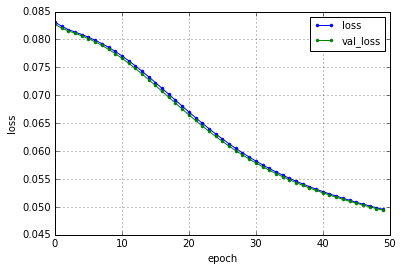

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adadelta
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0544 - val_loss: 0.0402
Epoch 2/50
3s - loss: 0.0347 - val_loss: 0.0302
Epoch 3/50
3s - loss: 0.0274 - val_loss: 0.0251
Epoch 4/50
3s - loss: 0.0233 - val_loss: 0.0218
Epoch 5/50
4s - loss: 0.0207 - val_loss: 0.0197
Epoch 6/50
4s - loss: 0.0189 - val_loss: 0.0181
Epoch 7/50
3s - loss: 0.0177 - val_loss: 0.0172
Epoch 8/50
4s - loss: 0.0167 - val_loss: 0.0165
Epoch 9/50
3s - loss: 0.0159 - val_loss: 0.0154
Epoch 10/50
4s - loss: 0.0153 - val_loss: 0.0146
Epoch 11/50
3s - loss: 0.0148 - val_loss: 0.0152
Epoch 12/50
3s - loss: 0.0143 - val_loss: 0.0142
Epoch 13/50
4s - loss: 0.0138 - val_loss: 0.0137
Epoch 14/50
3s - loss: 0.0136 - val_loss: 0.0179
Epoch 15/50
3s - loss: 0.0132 - val_loss: 0.0156
Epoch 16/50
4s - loss: 0.0131 - val_loss: 0.0124
Epoch 17/50
4s - loss: 0.0127 - val_loss: 0.0179
Epoch 18/50
3s - loss: 0.0125 - val_loss: 0.0124
Epoch 19/50
4s - los

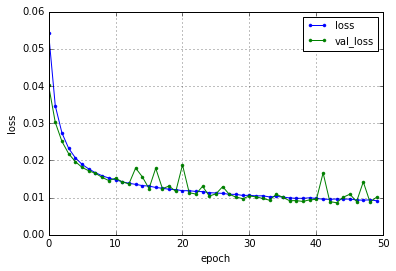

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adamax
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0216 - val_loss: 0.0131
Epoch 2/50
4s - loss: 0.0112 - val_loss: 0.0092
Epoch 3/50
4s - loss: 0.0085 - val_loss: 0.0072
Epoch 4/50
4s - loss: 0.0075 - val_loss: 0.0079
Epoch 5/50
3s - loss: 0.0069 - val_loss: 0.0068
Epoch 6/50
4s - loss: 0.0070 - val_loss: 0.0087
Epoch 7/50
4s - loss: 0.0069 - val_loss: 0.0063
Epoch 8/50
4s - loss: 0.0067 - val_loss: 0.0061
Epoch 9/50
4s - loss: 0.0063 - val_loss: 0.0058
Epoch 10/50
4s - loss: 0.0062 - val_loss: 0.0059
Epoch 11/50
3s - loss: 0.0062 - val_loss: 0.0062
Epoch 12/50
4s - loss: 0.0063 - val_loss: 0.0057
Epoch 13/50
4s - loss: 0.0060 - val_loss: 0.0068
Epoch 14/50
4s - loss: 0.0064 - val_loss: 0.0071
Epoch 15/50
3s - loss: 0.0062 - val_loss: 0.0062
Epoch 16/50
4s - loss: 0.0063 - val_loss: 0.0060
Epoch 17/50
4s - loss: 0.0063 - val_loss: 0.0067
Epoch 18/50
4s - loss: 0.0062 - val_loss: 0.0061


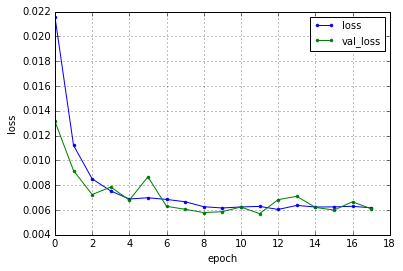

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0220 - val_loss: 0.0122
Epoch 2/50
4s - loss: 0.0115 - val_loss: 0.0088
Epoch 3/50
4s - loss: 0.0093 - val_loss: 0.0080
Epoch 4/50
3s - loss: 0.0089 - val_loss: 0.0078
Epoch 5/50
3s - loss: 0.0084 - val_loss: 0.0075
Epoch 6/50
3s - loss: 0.0079 - val_loss: 0.0089
Epoch 7/50
4s - loss: 0.0081 - val_loss: 0.0072
Epoch 8/50
4s - loss: 0.0078 - val_loss: 0.0074
Epoch 9/50
3s - loss: 0.0079 - val_loss: 0.0084
Epoch 10/50
4s - loss: 0.0075 - val_loss: 0.0074
Epoch 11/50
3s - loss: 0.0082 - val_loss: 0.0068
Epoch 12/50
4s - loss: 0.0074 - val_loss: 0.0076
Epoch 13/50
4s - loss: 0.0076 - val_loss: 0.0067
Epoch 14/50
4s - loss: 0.0072 - val_loss: 0.0068
Epoch 15/50
4s - loss: 0.0077 - val_loss: 0.0066
Epoch 16/50
4s - loss: 0.0083 - val_loss: 0.0068
Epoch 17/50
4s - loss: 0.0078 - val_loss: 0.0080
Epoch 18/50
4s - loss: 0.0077 - val_loss: 0.0076
Epoch 19/50
4s - loss: 0

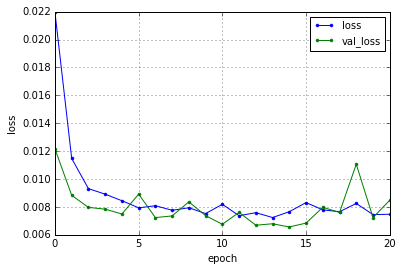

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adagrad
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0224 - val_loss: 0.0138
Epoch 2/50
3s - loss: 0.0131 - val_loss: 0.0105
Epoch 3/50
3s - loss: 0.0109 - val_loss: 0.0173
Epoch 4/50
4s - loss: 0.0098 - val_loss: 0.0086
Epoch 5/50
3s - loss: 0.0090 - val_loss: 0.0083
Epoch 6/50
4s - loss: 0.0085 - val_loss: 0.0093
Epoch 7/50
4s - loss: 0.0080 - val_loss: 0.0148
Epoch 8/50
4s - loss: 0.0079 - val_loss: 0.0072
Epoch 9/50
4s - loss: 0.0077 - val_loss: 0.0071
Epoch 10/50
4s - loss: 0.0075 - val_loss: 0.0068
Epoch 11/50
4s - loss: 0.0072 - val_loss: 0.0068
Epoch 12/50
4s - loss: 0.0072 - val_loss: 0.0067
Epoch 13/50
3s - loss: 0.0070 - val_loss: 0.0064
Epoch 14/50
4s - loss: 0.0070 - val_loss: 0.0064
Epoch 15/50
4s - loss: 0.0068 - val_loss: 0.0069
Epoch 16/50
4s - loss: 0.0068 - val_loss: 0.0063
Epoch 17/50
3s - loss: 0.0068 - val_loss: 0.0067
Epoch 18/50
3s - loss: 0.0066 - val_loss: 0.0070
Epoch 19/50
4s - loss

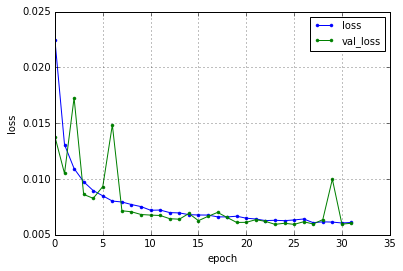

hiden node = 16
-edim=16-Window=2048-Overlap=16-RMSprop
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0235 - val_loss: 0.0134
Epoch 2/50
4s - loss: 0.0164 - val_loss: 0.0125
Epoch 3/50
3s - loss: 0.0154 - val_loss: 0.0122
Epoch 4/50
4s - loss: 0.0150 - val_loss: 0.0113
Epoch 5/50
3s - loss: 0.0151 - val_loss: 0.0145
Epoch 6/50
3s - loss: 0.0148 - val_loss: 0.0152
Epoch 7/50
4s - loss: 0.0148 - val_loss: 0.0104
Epoch 8/50
3s - loss: 0.0148 - val_loss: 0.0113
Epoch 9/50
4s - loss: 0.0146 - val_loss: 0.0213
Epoch 10/50
3s - loss: 0.0148 - val_loss: 0.0120
Epoch 11/50
3s - loss: 0.0146 - val_loss: 0.0110
Epoch 12/50
3s - loss: 0.0146 - val_loss: 0.0173
Epoch 13/50
4s - loss: 0.0146 - val_loss: 0.0274


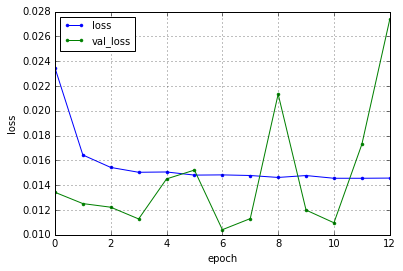

hiden node = 16
-edim=16-Window=2048-Overlap=16-Nadam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0260 - val_loss: 0.0224
Epoch 2/50
4s - loss: 0.0198 - val_loss: 0.0284
Epoch 3/50
3s - loss: 0.0185 - val_loss: 0.0230
Epoch 4/50
3s - loss: 0.0193 - val_loss: 0.0152
Epoch 5/50
3s - loss: 0.0234 - val_loss: 0.0244
Epoch 6/50
4s - loss: 0.0205 - val_loss: 0.0169
Epoch 7/50
4s - loss: 0.0169 - val_loss: 0.0142
Epoch 8/50
3s - loss: 0.0151 - val_loss: 0.0125
Epoch 9/50
4s - loss: 0.0133 - val_loss: 0.0141
Epoch 10/50
4s - loss: 0.0143 - val_loss: 0.0276
Epoch 11/50
4s - loss: 0.0118 - val_loss: 0.0097
Epoch 12/50
4s - loss: 0.0128 - val_loss: 0.0129
Epoch 13/50
3s - loss: 0.0127 - val_loss: 0.0112
Epoch 14/50
3s - loss: 0.0108 - val_loss: 0.0089
Epoch 15/50
4s - loss: 0.0114 - val_loss: 0.0175
Epoch 16/50
4s - loss: 0.0114 - val_loss: 0.0111
Epoch 17/50
4s - loss: 0.0107 - val_loss: 0.0146
Epoch 18/50
4s - loss: 0.0106 - val_loss: 0.0089
Epoch 19/50
4s - loss: 

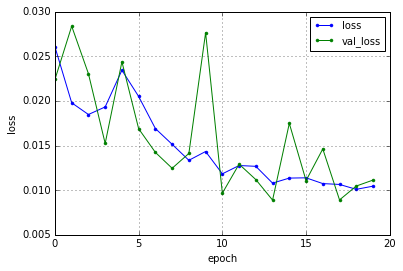

AccZ is registed now
Build Complete
(254742,)
windowData's num =15666
SourceData's aborting data = 6
window shape is (15666, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=16-SGD
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
7s - loss: 0.0832 - val_loss: 0.0831
Epoch 2/50
7s - loss: 0.0830 - val_loss: 0.0829
Epoch 3/50
7s - loss: 0.0828 - val_loss: 0.0827
Epoch 4/50
7s - loss: 0.0826 - val_loss: 0.0825
Epoch 5/50
7s - loss: 0.0825 - val_loss: 0.0824
Epoch 6/50
7s - loss: 0.0823 - val_loss: 0.0822
Epoch 7/50
7s - loss: 0.0822 - val_loss: 0.0821
Epoch 8/50
7s - loss: 0.0820 - val_loss: 0.0819
Epoch 9/50
7s - loss: 0.0818 - val_loss: 0.0817
Epoch 10/50
7s - loss: 0.0816 - val_loss: 0.0815
Epoch 11/50
7s - loss: 0.0814 - val_loss: 0.0813
Epoch 12/50
7s - loss: 0.0812 - val_loss: 0.0811
Epoch 13/50
7s - loss: 0.0810 - val_loss: 0.0808
Epoch 14/50
7s - loss: 0.0807 - val_loss: 0.0805
Epoch 15/50
7s - loss: 0.0804 - val_loss: 0.0802
Epoch 16/50
7s - loss: 0.0801 - val_lo

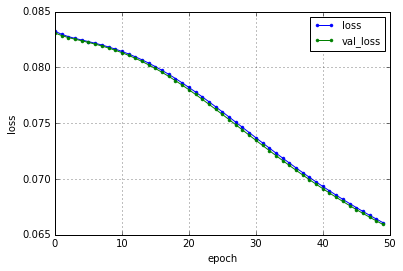

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adadelta
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
7s - loss: 0.0684 - val_loss: 0.0556
Epoch 2/50
7s - loss: 0.0501 - val_loss: 0.0458
Epoch 3/50
7s - loss: 0.0428 - val_loss: 0.0401
Epoch 4/50
6s - loss: 0.0380 - val_loss: 0.0361
Epoch 5/50
6s - loss: 0.0344 - val_loss: 0.0328
Epoch 6/50
6s - loss: 0.0315 - val_loss: 0.0302
Epoch 7/50
6s - loss: 0.0291 - val_loss: 0.0282
Epoch 8/50
6s - loss: 0.0273 - val_loss: 0.0264
Epoch 9/50
6s - loss: 0.0257 - val_loss: 0.0250
Epoch 10/50
7s - loss: 0.0245 - val_loss: 0.0239
Epoch 11/50
6s - loss: 0.0235 - val_loss: 0.0229
Epoch 12/50
6s - loss: 0.0226 - val_loss: 0.0221
Epoch 13/50
6s - loss: 0.0219 - val_loss: 0.0228
Epoch 14/50
6s - loss: 0.0213 - val_loss: 0.0212
Epoch 15/50
6s - loss: 0.0207 - val_loss: 0.0201
Epoch 16/50
6s - loss: 0.0203 - val_loss: 0.0204
Epoch 17/50
6s - loss: 0.0199 - val_loss: 0.0197
Epoch 18/50
6s - loss: 0.0195 - val_loss: 0.0192
Epoch 19/50
6s - los

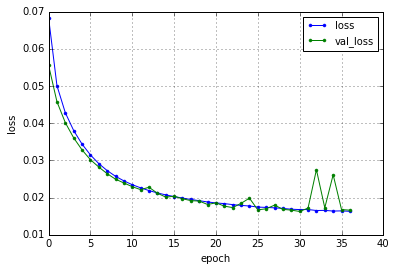

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adamax
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.0269 - val_loss: 0.0171
Epoch 2/50
7s - loss: 0.0155 - val_loss: 0.0137
Epoch 3/50
6s - loss: 0.0136 - val_loss: 0.0146
Epoch 4/50
6s - loss: 0.0125 - val_loss: 0.0116
Epoch 5/50
6s - loss: 0.0121 - val_loss: 0.0117
Epoch 6/50
6s - loss: 0.0120 - val_loss: 0.0142
Epoch 7/50
6s - loss: 0.0119 - val_loss: 0.0139
Epoch 8/50
6s - loss: 0.0121 - val_loss: 0.0113
Epoch 9/50
7s - loss: 0.0119 - val_loss: 0.0140
Epoch 10/50
6s - loss: 0.0116 - val_loss: 0.0118
Epoch 11/50
6s - loss: 0.0115 - val_loss: 0.0111
Epoch 12/50
8s - loss: 0.0118 - val_loss: 0.0127
Epoch 13/50
7s - loss: 0.0119 - val_loss: 0.0109
Epoch 14/50
6s - loss: 0.0115 - val_loss: 0.0104
Epoch 15/50
7s - loss: 0.0112 - val_loss: 0.0120
Epoch 16/50
6s - loss: 0.0116 - val_loss: 0.0121
Epoch 17/50
6s - loss: 0.0117 - val_loss: 0.0121
Epoch 18/50
8s - loss: 0.0112 - val_loss: 0.0105
Epoch 19/50
6s - loss:

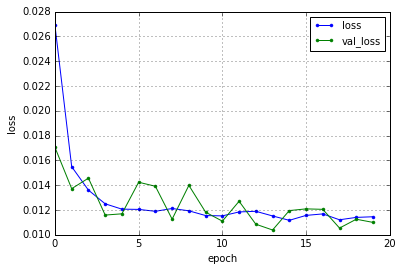

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
7s - loss: 0.0300 - val_loss: 0.0207
Epoch 2/50
8s - loss: 0.0214 - val_loss: 0.0188
Epoch 3/50
6s - loss: 0.0189 - val_loss: 0.0167
Epoch 4/50
6s - loss: 0.0182 - val_loss: 0.0194
Epoch 5/50
7s - loss: 0.0163 - val_loss: 0.0178
Epoch 6/50
6s - loss: 0.0168 - val_loss: 0.0139
Epoch 7/50
6s - loss: 0.0167 - val_loss: 0.0157
Epoch 8/50
6s - loss: 0.0182 - val_loss: 0.0147
Epoch 9/50
6s - loss: 0.0162 - val_loss: 0.0161
Epoch 10/50
7s - loss: 0.0166 - val_loss: 0.0167
Epoch 11/50
7s - loss: 0.0154 - val_loss: 0.0133
Epoch 12/50
6s - loss: 0.0156 - val_loss: 0.0145
Epoch 13/50
8s - loss: 0.0158 - val_loss: 0.0167
Epoch 14/50
7s - loss: 0.0164 - val_loss: 0.0143
Epoch 15/50
6s - loss: 0.0153 - val_loss: 0.0146
Epoch 16/50
7s - loss: 0.0147 - val_loss: 0.0155
Epoch 17/50
6s - loss: 0.0159 - val_loss: 0.0146


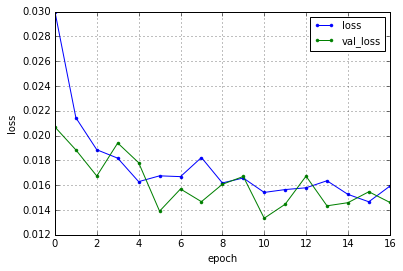

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adagrad
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.0298 - val_loss: 0.0255
Epoch 2/50
6s - loss: 0.0218 - val_loss: 0.0182
Epoch 3/50
6s - loss: 0.0184 - val_loss: 0.0164
Epoch 4/50
6s - loss: 0.0165 - val_loss: 0.0188
Epoch 5/50
8s - loss: 0.0154 - val_loss: 0.0138
Epoch 6/50
7s - loss: 0.0146 - val_loss: 0.0151
Epoch 7/50
6s - loss: 0.0140 - val_loss: 0.0144
Epoch 8/50
7s - loss: 0.0137 - val_loss: 0.0123
Epoch 9/50
6s - loss: 0.0132 - val_loss: 0.0124
Epoch 10/50
6s - loss: 0.0127 - val_loss: 0.0127
Epoch 11/50
6s - loss: 0.0127 - val_loss: 0.0117
Epoch 12/50
6s - loss: 0.0124 - val_loss: 0.0117
Epoch 13/50
6s - loss: 0.0124 - val_loss: 0.0117
Epoch 14/50
7s - loss: 0.0121 - val_loss: 0.0127
Epoch 15/50
6s - loss: 0.0120 - val_loss: 0.0132
Epoch 16/50
6s - loss: 0.0119 - val_loss: 0.0112
Epoch 17/50
6s - loss: 0.0116 - val_loss: 0.0129
Epoch 18/50
6s - loss: 0.0116 - val_loss: 0.0114
Epoch 19/50
6s - loss

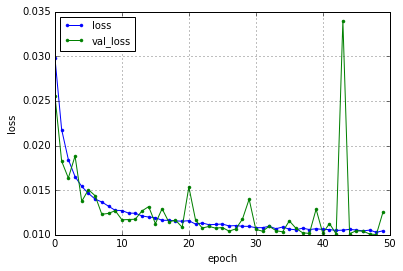

hiden node = 16
-edim=16-Window=4096-Overlap=16-RMSprop
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.0302 - val_loss: 0.0302
Epoch 2/50
6s - loss: 0.0242 - val_loss: 0.0220
Epoch 3/50
7s - loss: 0.0236 - val_loss: 0.0211
Epoch 4/50
6s - loss: 0.0233 - val_loss: 0.0221
Epoch 5/50
7s - loss: 0.0232 - val_loss: 0.0306
Epoch 6/50
6s - loss: 0.0231 - val_loss: 0.0283
Epoch 7/50
6s - loss: 0.0230 - val_loss: 0.0286
Epoch 8/50
6s - loss: 0.0232 - val_loss: 0.0198
Epoch 9/50
6s - loss: 0.0231 - val_loss: 0.0196
Epoch 10/50
6s - loss: 0.0231 - val_loss: 0.0198
Epoch 11/50
6s - loss: 0.0229 - val_loss: 0.0236
Epoch 12/50
6s - loss: 0.0229 - val_loss: 0.0257
Epoch 13/50
7s - loss: 0.0229 - val_loss: 0.0208
Epoch 14/50
6s - loss: 0.0226 - val_loss: 0.0304
Epoch 15/50
6s - loss: 0.0227 - val_loss: 0.0229


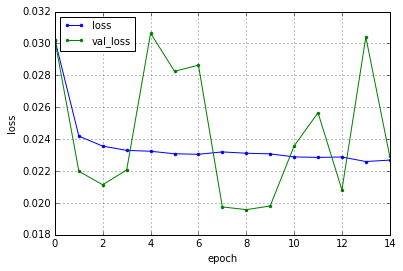

hiden node = 16
-edim=16-Window=4096-Overlap=16-Nadam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.0339 - val_loss: 0.0292
Epoch 2/50
7s - loss: 0.0303 - val_loss: 0.0317
Epoch 3/50
7s - loss: 0.0299 - val_loss: 0.0299
Epoch 4/50
9s - loss: 0.0296 - val_loss: 0.0300
Epoch 5/50
8s - loss: 0.0290 - val_loss: 0.0291
Epoch 6/50
7s - loss: 0.0289 - val_loss: 0.0276
Epoch 7/50
8s - loss: 0.0289 - val_loss: 0.0290
Epoch 8/50
7s - loss: 0.0284 - val_loss: 0.0276
Epoch 9/50
7s - loss: 0.0292 - val_loss: 0.0296
Epoch 10/50
6s - loss: 0.0285 - val_loss: 0.0310
Epoch 11/50
6s - loss: 0.0276 - val_loss: 0.0290
Epoch 12/50
6s - loss: 0.0278 - val_loss: 0.0285


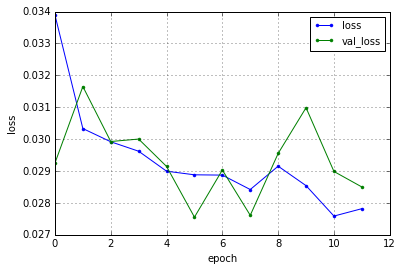

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    for opt,optName in zip(optimizers,optimArray):
        print "hiden node = "+str(encoding_dim)
        CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName
        print CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer=opt(), loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()

In [9]:
print "finish"

finish
